# Линейные модели

## Почему вам будет полезен этот семинар:
1. Вы познакомитесь с этапами построения модели машинного обучения
2. Самостоятельно обучите модель
3. Узнаете, как правильно оценивать результаты работы моделей машинного обучения

Это поможет вам грамотнее управлять проектами по машинному обучению и лучше понимать их специфику.

**Область применения:**

* Прогноз стоимости ценных бумаг
* Анализ спроса, объема продаж
* Медицинские диагнозы
* Любые зависимости числа от времени
* Прогнозирование цен на недвижимость
* И многое другое....

<img alt="" width="50" align="center" src=""/>

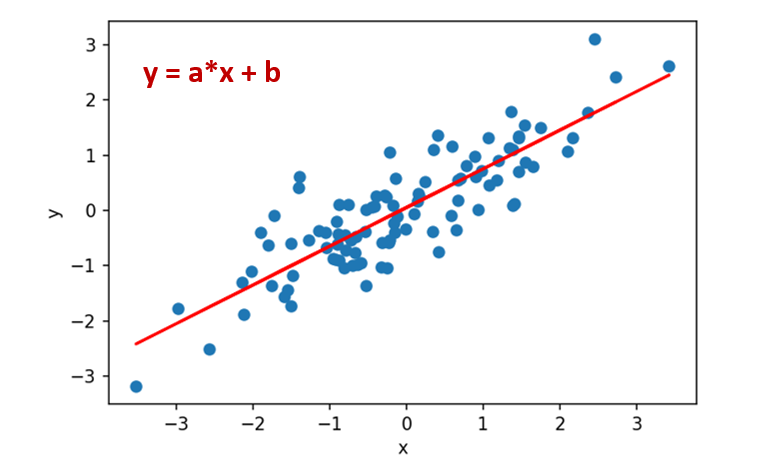




# Практика

На первом занятии мы научимся базовым приемам обучения моделей машинного обучения и поближе познакомимся с линейными моделями.

Мы будем работать с набором данных Bikes Rent, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Именно __число прокатов велосипедов__ мы и будем __предсказывать__; таким образом, мы будем решать задачу __регрессии__.

Для каждого дня проката известны следующие __признаки__:
* _season_: 1 - зима, 2 - весна, 3 - лето, 4 - осень
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12 (соответственно январь--декабрь)
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6 (соответственно воскресенье--cуббота)
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в градусах Цельсия (нормированная)
* _hum_: влажность (нормированная)
* _windspeed(ms)_: скорость ветра в метрах в секунду (нормированная)
* _cnt_: количество арендованных велосипедов (это целевая переменная, ее мы будем предсказывать)

Для практики специально выбраны небольшие данные, чтобы построение моделей выполнялось быстро, а рассматриваемая задача и признаки были просты для интерпретации. Стоит отметить, что весь код, который мы будем писать, применим для совершенно любых данных; нужно только заменить название файла.

В практике нам потребуются две библиотеки:

* Pandas (от "panel data") - для подготовки данных.
С документацией для данной библиотеки можно ознакомиться здесь: https://pandas.pydata.org/docs/

* Sklearn (scikit-learn) - основная библиотека для машинного обучения. С документацией для данной библиотеки можно ознакомиться здесь:
https://scikit-learn.org/stable/user_guide.html

Нашей основной целью будет познакомиться с библиотекой sklearn - именно она отвечает за построение моделей, и благодаря тому, что она работает с уже подготовленными данными, код для этой библиотеки достаточно простой и унифицированный.

Далее мы выполним минимальный набор действий по загрузке данных и построению на них модели машинного обучения. План действий:
1. Сбор данных
1. Обработка данных
1. Обучение модели
1. Получение предсказаний модели
1. Оценка качества предсказаний
1. Анализ модели

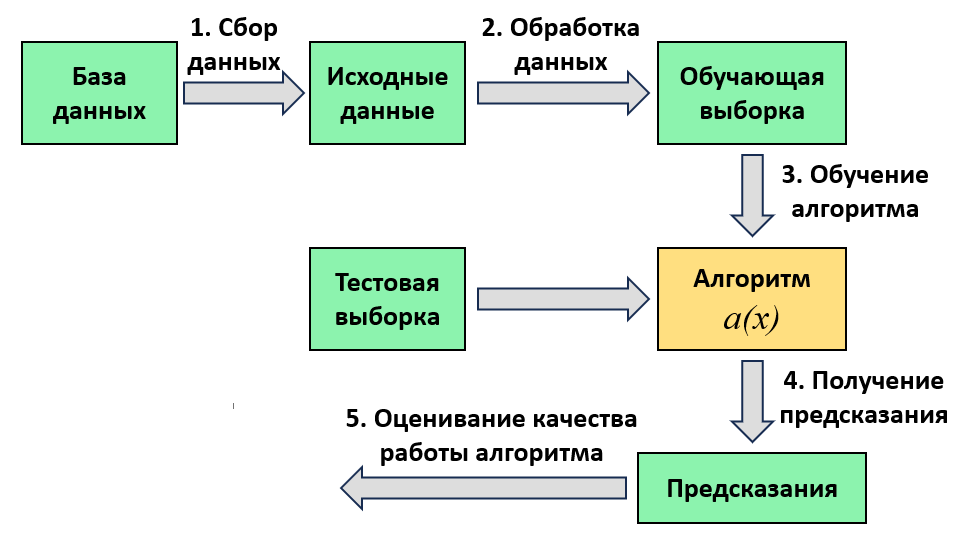

### Шаг 1. Сбор (подгрузка) данных

Загрузим данные с помощью библиотеки Pandas.

Импортируем библиотеку, сообщая Python, что далее мы будем обращаться к этой библиотеке как pd (as pd):

In [ ]:
import pandas as pd #импортируем библиотеку pandas

Загружаем данные по ссылке, используя функцию `read_excel`:

In [ ]:
# загружаем таблицу формата xlsx
data = pd.read_excel("https://github.com/Gaechka777/data/raw/main/bike.xlsx")

Также мы могли бы подгрузить данные напрямую из файла, часто еще используются файлы формата csv:

In [ ]:
#data = pd.read_csv('bike.csv', sep = ';') # загружаем файл формата сsv, разделитель ;

Посмотрим на фрагмент данных, для этого удобно использовать функцию `.head(N)`, которая показывает первые N строк данных. По умолчанию N=5, то есть показываются 5 строк.

In [ ]:
data.head() # выводим первые пять строчек

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,0.355170,0.828620,0.284606,985
1,1,0,1,0,0,0,2,0.379232,0.715771,0.466215,801
2,1,0,1,0,1,1,1,0.171000,0.449638,0.465740,1349
3,1,0,1,0,2,1,1,0.175530,0.607131,0.284297,1562
4,1,0,1,0,3,1,1,0.209120,0.449313,0.339143,1600


По строкам таблицы расположены дни работы проката (объекты), по столбцам - их характеристики (признаки). Расшифровки столбцов были даны выше. В последнем столбце записаны значения cnt (число арендованных велосипедов) - это наша целевая переменная.

Число объектов и число признаков хранятся в переменной shape:

In [ ]:
# число строк, число столбцов
data.shape

(731, 11)

### Шаг 2.1 Обработка данных: изучение данных

Мы можем вывести общую информацию про наши данные: количество непустых элементов в каждом столбце и тип каждого столбца

In [ ]:
data.info() #общая информация про данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
 10  cnt            731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


Выведем описательные статистики для нашей таблицы

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.0,2.000000,3.000000,3.000000,4.0
yr,731.0,0.500684,0.500342,0.0,0.000000,1.000000,1.000000,1.0
mnth,731.0,6.519836,3.451913,1.0,4.000000,7.000000,10.000000,12.0
holiday,731.0,0.028728,0.167155,0.0,0.000000,0.000000,0.000000,1.0
weekday,731.0,2.997264,2.004787,0.0,1.000000,3.000000,5.000000,6.0
workingday,731.0,0.683995,0.465233,0.0,0.000000,1.000000,1.000000,1.0
weathersit,731.0,1.395349,0.544894,1.0,1.000000,1.000000,2.000000,3.0
temp,731.0,0.543594,0.228091,0.0,0.346343,0.547268,0.743002,1.0
hum,731.0,0.645649,0.146457,0.0,0.534704,0.644388,0.750857,1.0
windspeed(ms),731.0,0.346536,0.159766,0.0,0.232045,0.326928,0.434622,1.0


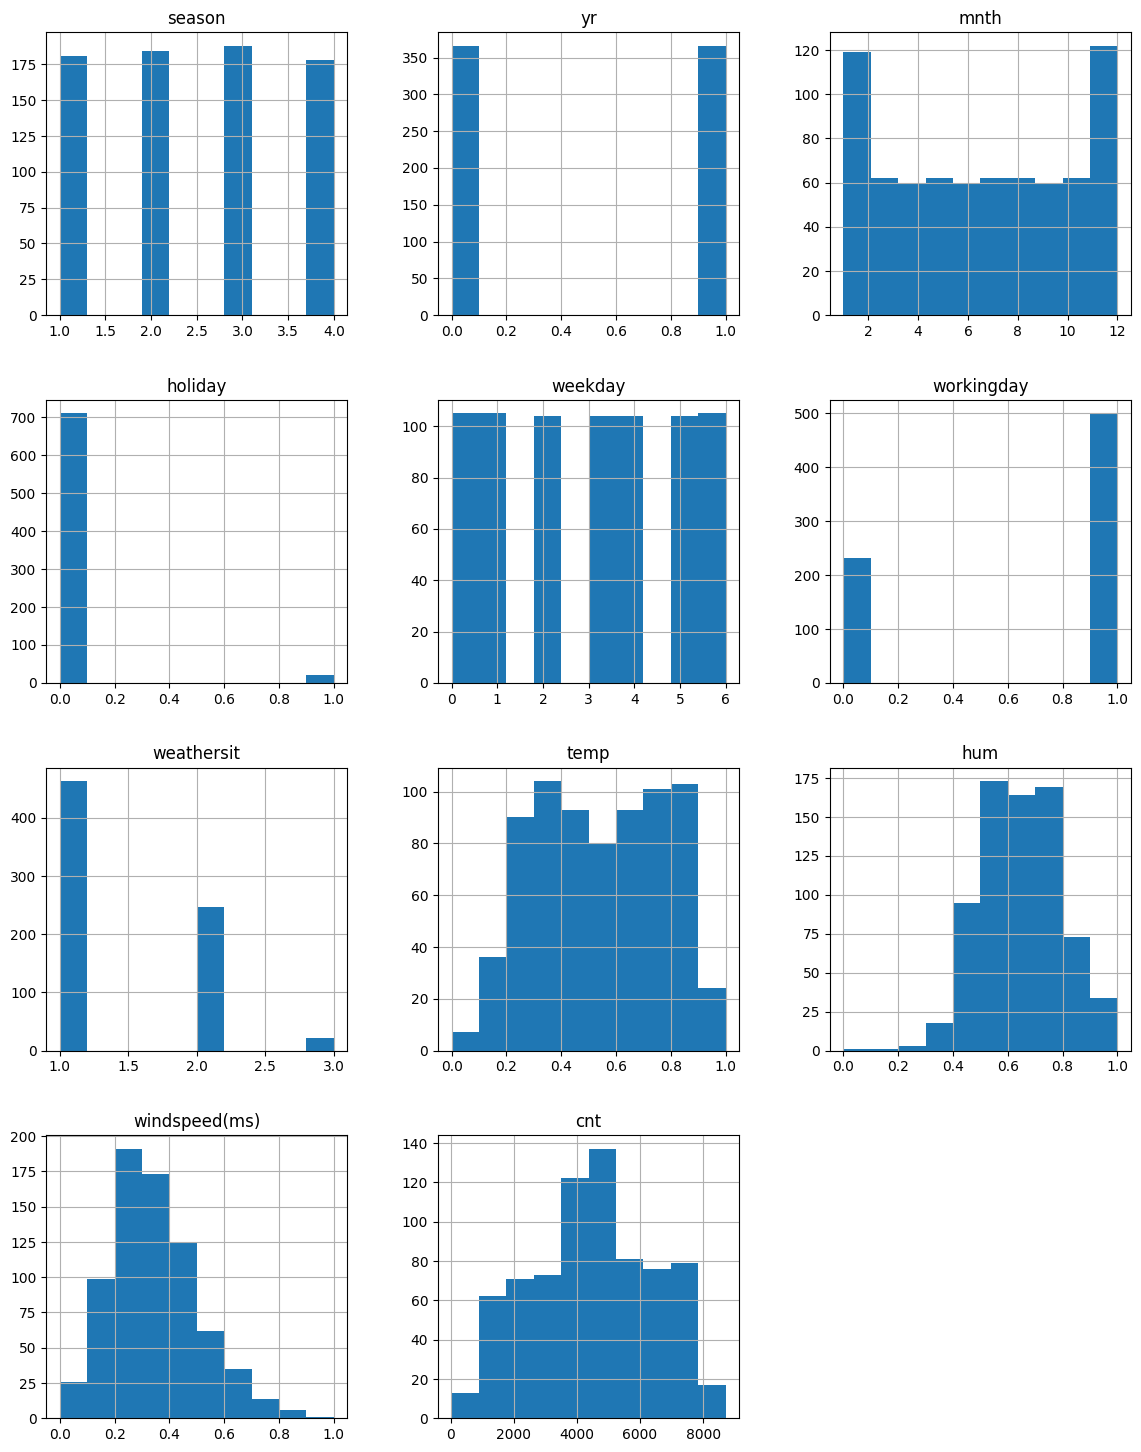

In [ ]:
data.hist(figsize=(14, 18));

**Вопрос**: почему в датасете больше данных о прокате велосипедов в 1 и 12 месяцы?

Давайте более детально рассмотрим столбец сезона в нашем датасете.

In [ ]:
data['season']

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64

Рассчитаем максимальный поток ветра для определенного сезона

In [ ]:
cond = data['season'] == 3 #маска для фильтрации
data[cond]['windspeed(ms)'].max()

0.728192535818503

In [ ]:
print(data[data['holiday'] == 0]['cnt'].median(),
      data[data['holiday'] == 1]['cnt'].median())

4558.0 3351.0


#### Задача 1. Изучение признаков

Напишите код для извлечения значения **медианной температуры** во **втором сезоне**.

In [ ]:
### Здесь Ваш код

### Шаг 2.2 Обработка данных: подготовка данных

В нашей таблице содержатся и признаки, и целевая переменная. Разделим их с помощью специальной команды:

In [ ]:
# отберем все колонки кроме последней: в ней находится целевая переменная
X = data.drop(['cnt'], axis=1)
Y = data["cnt"] #запишем в у целевую переменную

Это код, использующий библиотеку Pandas. Квадратные скобки означают выделение столбцов, внутри записываются желаемые столбцы.

Теперь у нас есть таблица признаков объектов, хранящаяся в переменной X, и значения целевой переменной ("ответы"), хранящиеся в переменной Y.

Следующий важный шаг - разделить данные на обучающую и тестовую части. Это позволит нам оценивать качество модели на данных, которые она еще не "видела".


Для разделения данных мы будем использовать библиотеку sklearn. Импортируем специальную функцию:

In [ ]:
# импортируем функцию для разбиения данных на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

Внутри функции `train_test_split` записываем данные, X и Y, также указываем дополнительные параметры: `test_size` - какую долю объектов мы бы хотели отделить в тестовую выборку (укажем 30%), а также параметр `random_state`. Деление данных выполняется _случайно_ (случайно выбранные строки размещаются в обучающей и тестовой частях), и чтобы при повторном выполнении ячейки выполнялось одно и то же разделение данных, мы указываем параметр `random_state`. Значение `random_state` может быть любым числом, и его выбор не влияет на качество разделения, но обеспечивает одинаковое разделение при использовании одного и того же значения.

In [ ]:
# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

В результате мы получили переменные:
* `X_train` - таблица признаков для объектов _обучающей_ части данных (выборки)
* `X_test` - таблица признаков для объектов _тестовой_ выборки
* `Y_train` - вектор правильных ответов для объектов _обучающей_ выборки
* `Y_test` - вектор правильных ответов для объектов _тестовой_ выборки

![](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-c2683c1/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png)

Посмотрим, сколько объектов попало в обучающую часть:

In [ ]:
X_train.shape

(511, 10)

511 строчек и 10 столбцов - 511 объектов и для каждого 10 признаков

Аналогично для тестовой части:

In [ ]:
X_test.shape

(220, 10)

220 строчек и 10 столбцов - 220 объектов и для каждого 10 признаков

### Шаг 3. Обучение линейной модели


**Линейная модель** суммирует значения всех признаков с некоторыми весами.

**Веса $w_i$ при признаках** - параметры, которые необходимо настраивать в процессе обучения

$$
a(x) = w_0 + w_1 \cdot x_1 + ... + w_d \cdot x_d
$$

где $d$ - число признаков.

Мы готовы к тому, чтобы построить модель машинного обучения. Обучим линейную модель на наших данных. Для этого импортируем алгоритм LinearRegression из модуля sklearn:

In [ ]:
# импортируем алгоритм для обучения линейной регрессии
from sklearn.linear_model import LinearRegression

Обучение модели в sklearn всегда состоит из двух шагов - создания модели (первая строка) и вызова функции fit:

In [ ]:
model = LinearRegression() # определяем модель
model.fit(X_train, Y_train) # обучаем модель на обучающей выборке

LinearRegression()

Для обучения обязательно нужны обе переменные `X_train` и `Y_train`, так как в процессе обучения модель учится предсказывать целевые переменные по признакам.

После обучения "внутри" модели появились найденные веса:

In [ ]:
model.coef_ # смотрим на коэффициенты - веса признаков

array([  491.66301206,  1940.24984286,   -36.18537078,  -417.63812751,
          58.22601869,    48.85286318,  -492.1258915 ,  4194.53117441,
       -1063.78514454, -1544.33657818])

In [ ]:
model.intercept_ # свободный коэффициент

1971.9424103830647

Мы проанализируем эти веса позже, пока мы просто проверили, что они появились.

### Шаг 4. Получение предсказаний линейной модели

Чтобы выполнить предсказания, нужно воспользоваться функцией `model.predict(X)`, подставив вместо X нужную переменную. Функция возвращает последовательность из предсказаний для каждого объекта, их нужно сохранить в какую-то переменную.

Выполним предсказания на двух выборках, обучающей и тестовой, и сохраним их в переменные preds_train и preds_test.

In [ ]:
# предсказываем значения целевой переменной для обучающей выборки
preds_train = model.predict(X_train)

# предсказываем значение целевой переменной для тестовой выборки
preds_test = model.predict(X_test)

Посмотрим на предсказания на первых 10 объектах ([:10] выделяет первые 10 чисел):

In [ ]:
preds_test[:10] # выведем значения с первого по десятое

array([5098.81405196, 5446.21687258, 1725.82178742, 1262.09230959,
       4137.67413235, 2983.83673035, 3574.13585718, 6083.94100051,
       5503.73948907, 1348.84916008])

А вот соответствующие правильные ответы из выборки:

In [ ]:
# выводим первые десять значений целевой переменной тестовой выборки
Y_test[:10].values

array([5923, 4592, 1248, 1360, 4075, 1817, 2659, 6234, 6857, 1167])

Сравнив два набора, можно увидеть, что в целом модель примерно "попадает" в порядок, но, конечно, не дает точных ответов, так как модели машинного обучения исходно задуманы, чтобы находить приближенные ответы. На следующем шаге мы полноценно оценим, насколько точны предсказани модели.

### Шаг 5. Оценивание качества

Сравнивать предсказания и правильные ответы вручную удобно только на маленькой выборке данных. Для оценивания качества работы модели нужно рассчитать метрику качества. Для этого в `sklearn` есть подмодуль `metrics`. Импортируем функции  `mean_squared_error` и `mean_absolute_error`:

**Среднее квадратическое отклонение или MSE (Mean Squared Error):**

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (a(x_i) - y_i) ^ 2 $$

$l$ - число объектов в выборке

Рассмотрим пример рассчета метрик, где модель предсказала 4 разных значения, а правильный ответ был всегда 10.

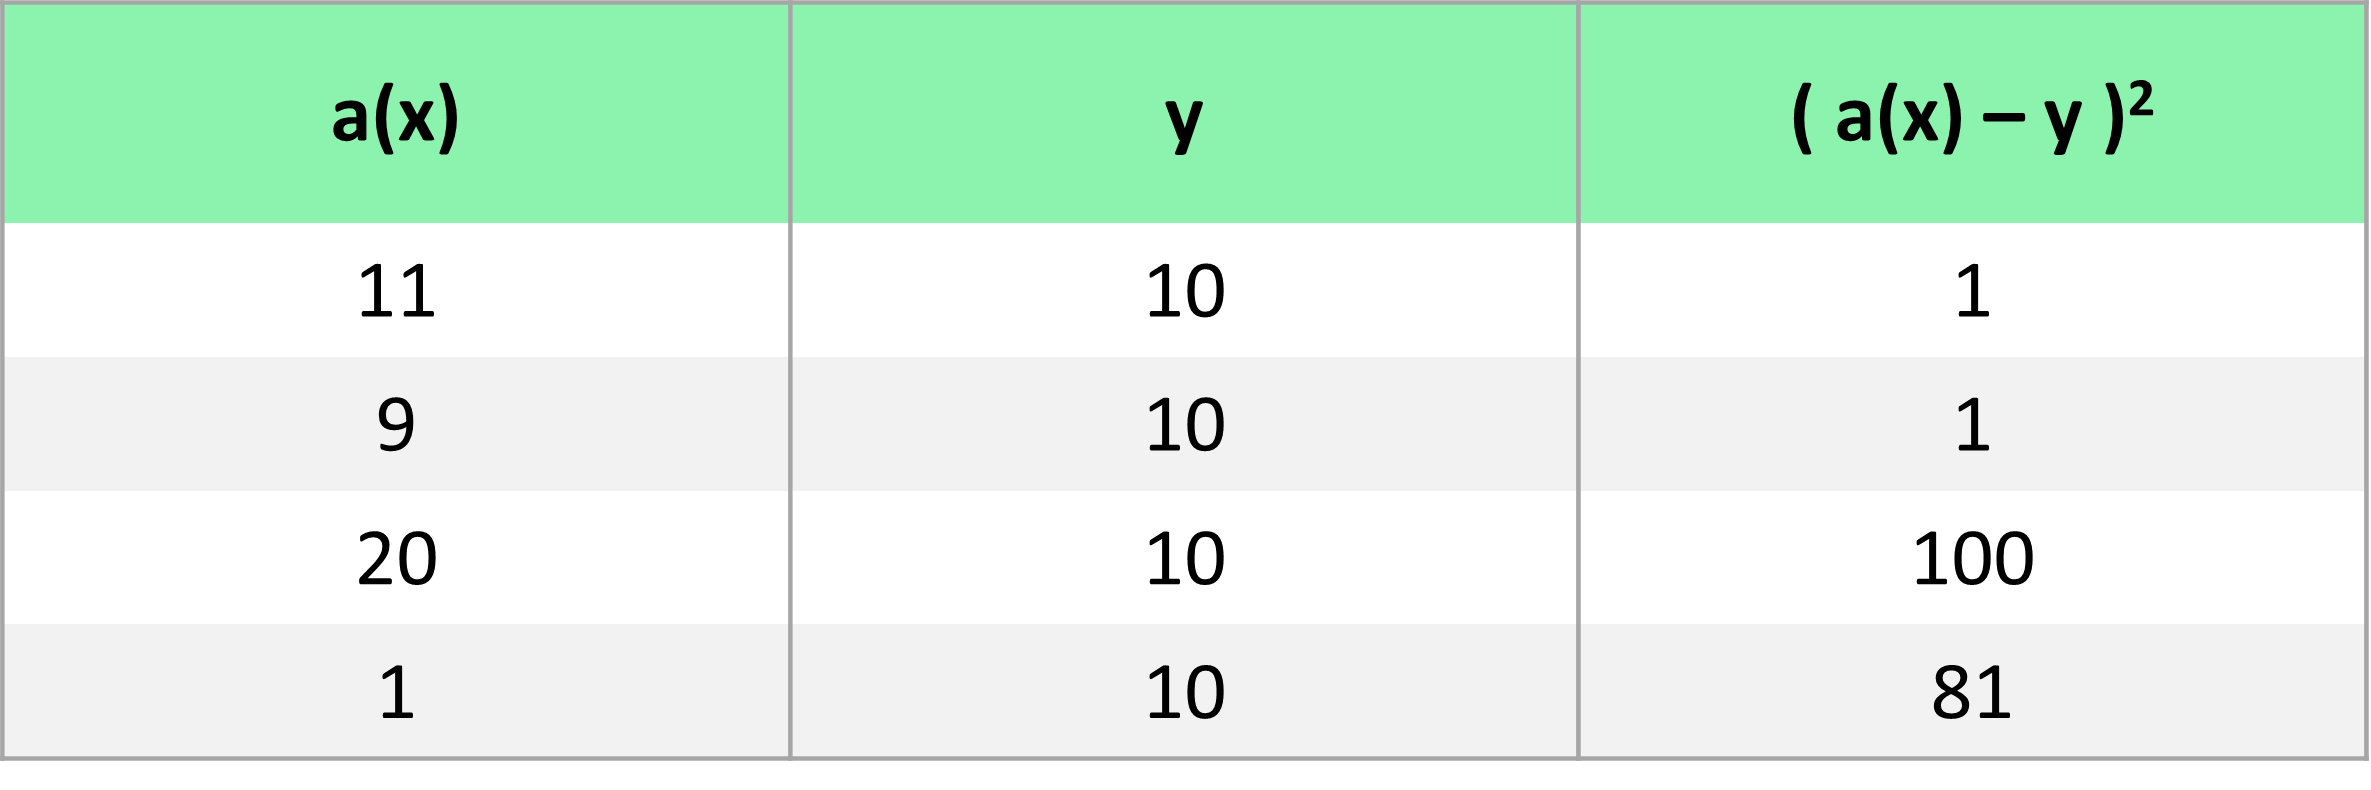


$$  MSE = \frac{1}{4} ((11 - 10)^ 2+ (9 - 10)^ 2 + (20 - 10)^ 2 + (1 - 10)^ 2)$$

$$ MSE = \frac{1}{4} (1 + 1 + 100 + 81) = 45.75 $$

In [ ]:
# импортировали функцию для вычисления значения метрики MSE
from sklearn.metrics import mean_squared_error

Вычисляем ошибку на обучающей и тестовой выборке:

In [ ]:
print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))

MSE train:  750836.2381242722
MSE test:   790147.6348620439


При использовании метрики MSE обе ошибки измеряются в "количестве велосипедов" в квадрате, что сложно интерпретировать. Но можно взять квардратный корень:

In [ ]:
import numpy as np
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))

RMSE train:  866.5080715863368
RMSE test:   888.9024889503032


**Среднее абсолютное отклонение или MAE (Mean Absolute Error):**

$$ MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| $$

$l$ - число объектов в выборке

В примере:

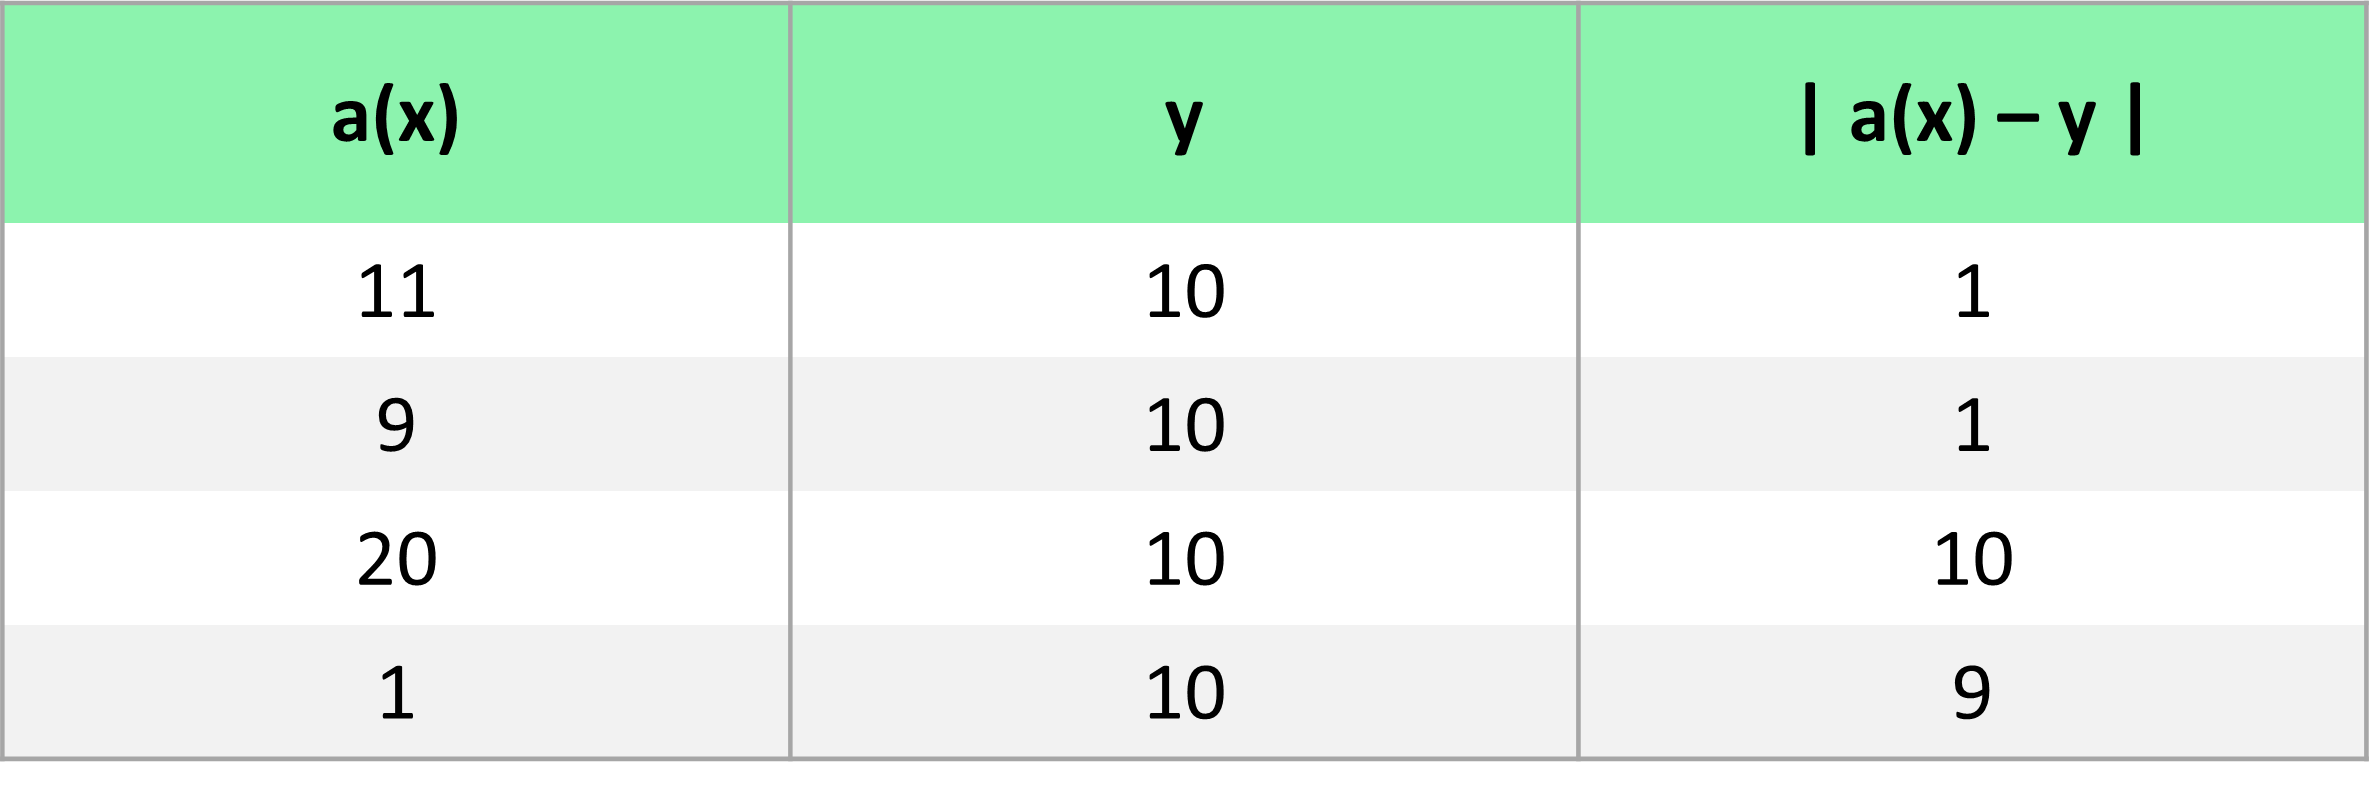


$$ MAE = \frac{1}{4} (1 + 1 + 10 + 9) = 5.25 $$

In [ ]:
# импортировали функцию для вычисления значения метрики MAE
from sklearn.metrics import mean_absolute_error

Вычисляем ошибку на обучающей и тестовой выборке:

In [ ]:
# нашли величину MAE для обучающей выборки
print('MAE train: ', mean_absolute_error(Y_train, preds_train))

# нашли величину MAE для тестовой выборки
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))

MAE train:  638.2216121950269
MAE test:   673.1744257004561


В функции нужно подставить переменные, хранящие правильные ответы и предсказанные.

При использовании метрики MAE обе ошибки измеряются в "количестве велосипедов", то есть в среднем модель ошибается примерно на 630 велосипедов в день. Много это или мало? На предыдущем шаге мы увидели, что сами предсказываемые величины (число арендованных велосипедов) измеряются в тысячах - 4000, 6000 и т. д. Таким образом, ошибка почти на порядок меньше предсказываемых величин, что выглядит вполне разумно. Важно понимать, что модель построена всего по нескольким сотням объектов, и на такой маленькой выборке данный результат можно считать вполне хорошим.

Разрыва между ошибкой на обучающей и тестовой частях данных у нас нет, значит, переживать из-за возможности переобучения не стоит.

**Среднее абсолютное процентное отклонение или MAPE (Mean Absolute Percentage Error):**

Мы измеряли качество модели с помощью наиболее простой метрики Mean absolute error (MAE). Она измеряется в тех же единицах, что и целевая переменная, в нашем случае это число велосипедов. Но часто хочется иметь метрику в процентах. И, конечно, метрику легко модифицировать так, чтобы она принимала значения в процентах - получится Mean absolute percentage error (MAPE):

$$MAPE = \frac 1 N \sum_{n=1}^N \frac {|y_n-a(x_n)|}{|y_n|}$$

В данной формуле выполняется суммирование по объектам выборки, далее ошибка предсказания $|y_n-a(x_n)|$ на каждом объекте делится на модуль целевой переменной $|y_n|$. Получается, мы смотрим, на какой процент от той, величины, что мы хотим предсказать, модель в среднем ошибается. Вместо среднего можно использовать медиану для большей устойчивости к выбросам.

Однако, если у нас один из исходных $y_i$ будет равен 0, то метрика по такому наблюдению не посчитается. Так как мы не поделим на ноль.

В нашем примере:

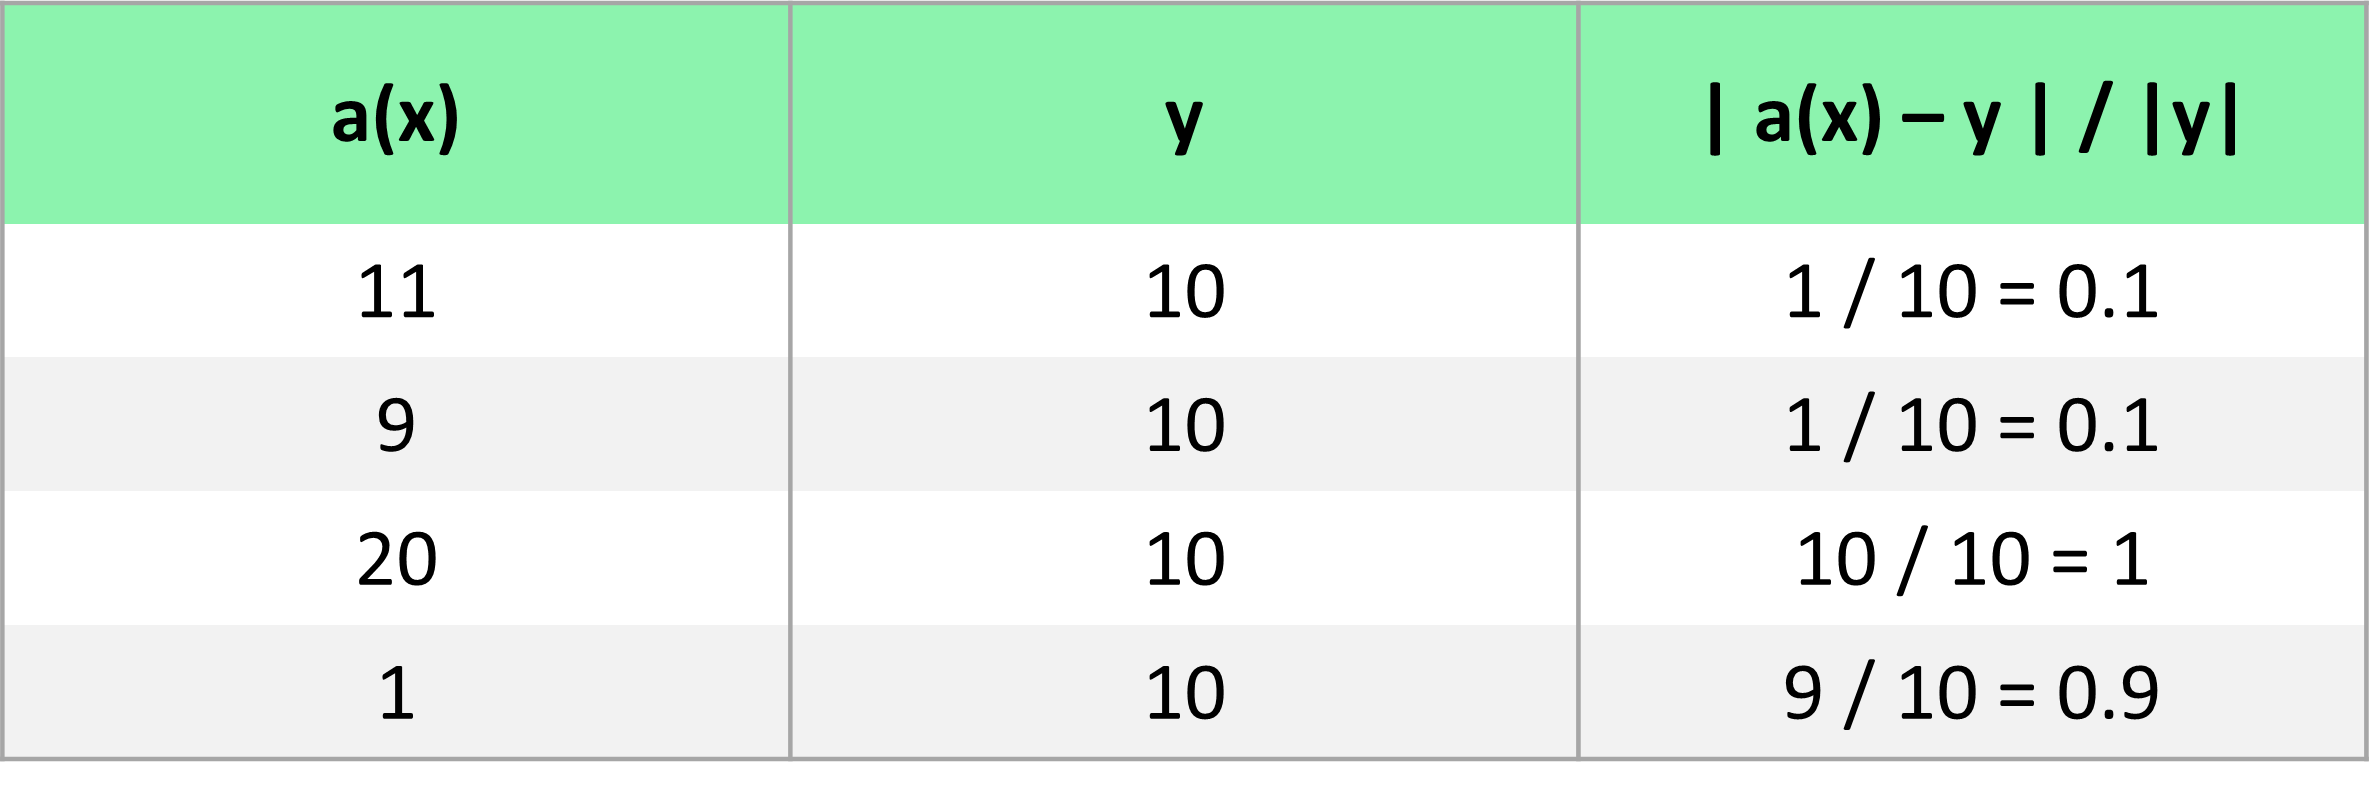


$$ MAPE = \frac{1}{4} (0.1 + 0.1 + 1 + 0.9) = 0.525 $$

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error #импортировали функцию для поиска значения метрики MAPE

In [ ]:
print('MAPE train: ', mean_absolute_percentage_error(Y_train, preds_train)) #нашли величину MAPE для обучающей выборки
print('MAPE test:  ', mean_absolute_percentage_error(Y_test, preds_test)) #нашли величину MAPE для тестовой выборки

MAPE train:  0.5568730077020365
MAPE test:   0.20295844215692643


#### Вопрос. Узнайте, в каких случаях какую метрику лучше использовать

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Чтобы выполнить это задание вам необходимо скопировать промпт без слова промпт в чат с мистралью.

**Промпт:**

Выпиши 5 главных метрик в задаче регрессии и укажи, в каких случаях какую метрику лучше использовать. Напиши ответ языком, понятным человеку, который почти не знаком с машинным обучением на русском языке.

### Шаг 6. Анализ модели

Посмотрим на веса признаков, найденные линейной моделью по обучающим данным. Запишем их в таблицу со столбцами "название признака" и "вес признака" и отсортируем по значениям весов:

In [ ]:
weights_data = {
    "веса":model.coef_,
    "признаки": data.columns[:-1]
}

# задаем с помощью словаря веса и признаки модели
weights = pd.DataFrame(weights_data) # преобразовываем признаки с весами в таблицу
weights.sort_values("веса") # сортируем полученную таблицу

,веса,признаки
9,-1544.336578,windspeed(ms)
8,-1063.785145,hum
6,-492.125891,weathersit
3,-417.638128,holiday
2,-36.185371,mnth
5,48.852863,workingday
4,58.226019,weekday
0,491.663012,season
1,1940.249843,yr
7,4194.531174,temp


Внизу и вверху таблицы расположены признаки, для которых подобраны большие по модулю веса. У каждого признака свой масштаб, поэтому сравнивать веса некорректно. Но мы можем смотреть на знаки коэффициентов. Например, чем выше температура (temp), тем больше арендуют велосипедов, а чем выше показатель "плохой погоды" (weathersit), тем меньше арендуют велосипедов. Обе тенденции вполне логичны.

### Поэкспериментируем с моделью

В следующих нескольких задачах мы попробуем немного менять нашу модель и посмотрим, можно ли достичь _меньшей_ ошибки.


Для начала давайте исследуем эффект отключения свободного коэффициента в формуле линейной модели. Вспомним, как линейная модель выполняет предсказания:
$$a(x) = w_1 \cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3+ \dots +w_d \cdot x_d +w_0 $$

Каждый из коэффициентов (весов) $w_1, \dots, w_d$ задает вклад соответствующего признака в предсказание. Последним в формуле следует коэффициент $w_0$, который задает, какое предсказание будет выполнено, если значения _всех_ признаков равны 0.

Давайте попробуем убрать $w_0$ из модели и посмотрим, как изменится средняя ошибка предсказания. Одновременно это будет хорошим упражнением по использованию библиотеки sklearn.

### Задания для самостоятельной работы

Перед выполнением заданий обязательно выполните все ячейки выше.
__При выполнении заданий используйте примеры кода, данные выше, а также__ [__таблицу с подсказками__](https://drive.google.com/file/d/1uQBr8a-CiQYJzuBIwIa2jBz7zDEab-hk/view?usp=sharing).

#### Задача 2. Обучение линейной модели без свободного коэффициента

Запишите код для __обучения__ модели (см. таблицу с подсказками по ссылке выше), а __далее внутри скобок в первой строчке__ укажите `fit_intercept=False`.



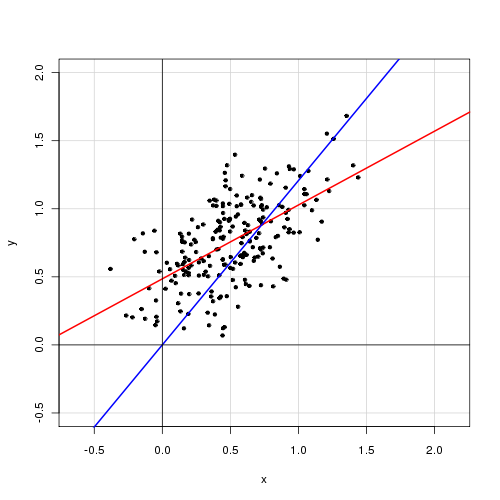

In [ ]:
### Здесь Ваш код

# обучение модели

#### Задача 3. Получение предсказаний линейной модели без свободного коэффициента

Выполните __предсказания__ с помощью модели, обученной в предыдущей задаче. Отдельно выполните предсказания для обучающей части данных (`X_train`), отдельно - для тестовой (`X_test`).

In [ ]:
### Здесь Ваш код

# preds_train = ...
# preds_test = ...

#### Задача 4. Измерение ошибки линейной модели без свободного коэффициента

Выведите значение ошибки для предсказаний, выполненных в предыдущей задаче. Выведите отдельно ошибку на обучающей части данных и отдельно - на тестовой.

In [ ]:
### Здесь Ваш код

__Сравните__ полученные значения ошибки с теми, что мы получали ранее. Позитивно или негативно сказалось отключение свободного коэффициента на ошибке линейной модели?

### Бонус: Кодирование категориальных признаков

В наших данных есть несколько признаков, которые принимают значения из фиксированного небольшого набора. Речь идет о признаках месяца, дня недели и сезона, и называются такие признаки _категориальными_. В текущем виде наших данных эти признаки просто пронумерованы. Это не лишено смысла, потому что и дни недели, и месяцы являются упорядоченными. Но с другой стороны, когда мы применяем линейную модель, она умножает значения признаков на веса, и, например, умножение "понедельника" на 2 не делает его "вторником", а значит, применять такое умножение не очень корректно.

Обычно для категориальных признаков используют дополнительную обработку, чтобы избежать таких некорректностей. В частности, вместо одного категориального признака создают несколько новых признаков, принимающих значения 0 и 1. Например, для признака "сезон" будет создано 4 новых, каждый отвечает за конкретный сезон. Если в конкретный день было лето, то значение признака "сезон-лето" будет равно 1, а значения признаков "сезон-весна", "сезон-осень" и "сезон-зима" будут 0.


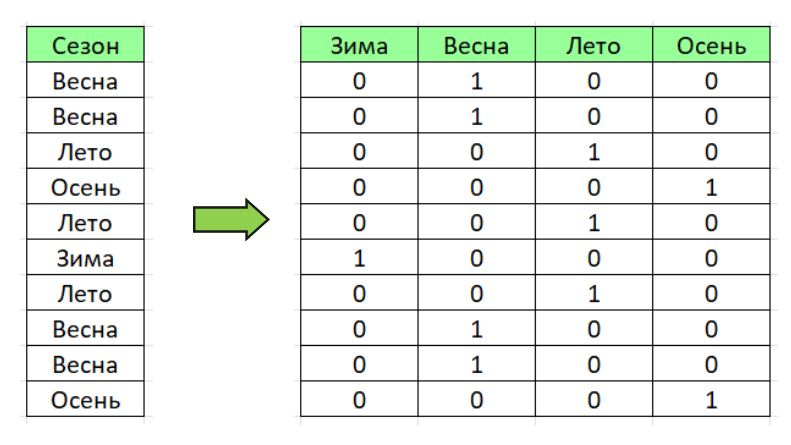

Попробуем применить такую обработку к нашим данным. Для этого воспользуемся функций `get_dummies` из библиотеки `pandas`:

In [ ]:
data_cat = pd.get_dummies(
    data, # задаем, для каких данных делаем дамми-переменные
    columns=["season", "mnth", "weekday"], # определяем признаки для трансформации
    drop_first=True # устанавливаем удаление первой переменной
)

data_cat.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed(ms),cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,0.355170,0.828620,0.284606,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,0.379232,0.715771,0.466215,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0.171000,0.449638,0.465740,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0.175530,0.607131,0.284297,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0.209120,0.449313,0.339143,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


Внутри `pd.get_dummies` мы указываем нашу таблицу с данными data, которую мы загрузили в самом начале занятия, и также указываем в списке, какие столбцы необходимо закодировать нулями и единицами, у нас это `["season", "mnth", "weekday"]`.

Каждый раз, когда мы кодируем переменные с помощью `pd.get_dummies`, мы сталкиваемся с проблемой того, что одну из категорий всегда можно предсказать на основе других. При сильной зависимости признаков, модели будет сложно определить, насколько каждый из признаков влияет на целевую переменную - коэффициенты регрессионной модели не будут передавать верную информацию. Поэтому мы указываем аргумент `drop_first=True`, который позволяет убрать избыточность столбцов.

Теперь, прежде чем построить модель, нам придется повторить предобработку данных: отделение X и Y, деление на обучающую и тестовую части.

#### Задача 5. отделение X и Y. Деление данных на обучение и тест

Разделите данные на признаки и целевую переменную.

In [ ]:
### Здесь Ваш код

# X_cat = ...
# Y_cat = ...

Разделите данные на обучающую и тестовую части. В подсказке деление данных показано на второй странице.

In [ ]:
### Здесь Ваш код

# X_train, X_test, Y_train, Y_test = ... ### Здесь Ваш код

#### Задача 6. Обучение, предсказание и вычисление ошибки с закодированными категориальными признаками

Повторите шаги задач 1-3, то есть обучение, выполнение предсказаний и оценивание ошибки, для новой версии данных, включающей обработанные категориальные признаки.

In [ ]:
### Здесь Ваш код

# model = ...

# обучение модели

# preds_train = ...
# preds_test = ...

print("Train:", mean_absolute_error(Y_train, preds_train))
print("Test:", mean_absolute_error(Y_test, preds_test))

__Сравните__ полученные значения ошибки с предыдущими моделями.

Посмотрим на веса новой модели:

In [ ]:
weights_data = {"веса":model.coef_,\
                "признаки": data_cat.columns.drop("cnt")}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

Теперь у каждой категории есть свой вес. Например, месяцы апрель, май, сентябрь, октябрь (`mnth_4`, `mnth_5`, `mnth_9`, `mnth_10`) имеют положительные веса, то есть в эти месяцы арендуют больше велосипедов.

## Итоги

Итак, мы изучили первую модель на Python - линейную регрессию, и теперь можем сделать следующие выводы:
* Линейная регрессия требует хорошей подготовки данных.
* В линейной регрессии целевая переменная - это линейная комбинация признаков
* Необходимо хорошо подбирать метрику качества под задачу.
* Не всегда категориальные признаки в датасете обозначены текстовыми категориями. Необходимо хорошо изучить все признаки.